# Do people at the International house pee in the sink?

## Sample

The sample was taken from men of the international house who had sinks in their dorm room. 

Women were not included because the iHouse sinks are quite high up. Most women would not be able to pee in one without putting her full weight on it unless she were very tall or had a standing peeing device, such as a GoGirl ™.
We assume most women do not want to run the risk of damaging their sinks by sitting on them, so we think the proportion of women who pee in their sinks is very low. This would bias the sample. 

All data entry was anonymized to protect the people answering the survey. No door to door surveys were done namely because people would be biased to say no. I also considered rewording questions to “when was the last time you peed in the sink” so more people would accept its normality but it would bias it in the other direction

## Analysis

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

#import fuzzywuzzy
sns.set_style("dark")

#read data
pee = pd.read_csv("PeeSinks.csv") 

pee.head(5)

,PeeSink,BathroomDistance,Religious,Alcohol,Country,Age
0,Yes,0,Yes,Yes,France,21.0
1,No,2,Yes,Yes,USA,27.0
2,No,3,Yes,Yes,USA,29.0
3,No,3,No,Yes,NaN,28.0
4,Yes,4,Yes,Yes,USA,24.0


In [2]:
#Convert certain values to binary for easier calculation
pee["PeeSink"] = pee.PeeSink.eq('Yes').mul(1)
pee["Religious"] = pee.Religious.eq('Yes').mul(1)
pee["Alcohol"] = pee.Alcohol.eq('Yes').mul(1)

#look at data
pee.describe()

,PeeSink,BathroomDistance,Religious,Alcohol,Age
count,29.000000,29.000000,29.000000,29.000000,28.000000
mean,0.413793,8.620690,0.482759,0.862069,25.750000
std,0.501230,4.952732,0.508548,0.350931,2.473938
min,0.000000,0.000000,0.000000,0.000000,21.000000
25%,0.000000,5.000000,0.000000,1.000000,24.000000
50%,0.000000,10.000000,0.000000,1.000000,25.500000
75%,1.000000,11.000000,1.000000,1.000000,27.250000
max,1.000000,20.000000,1.000000,1.000000,31.000000


I converted it to binary so it makes the values easier to read when using describe. From the mean we can tell percentage of yes under each category already

## Who actually pees in the sink

Text(0.5,1,'Do you Pee in the Sink')

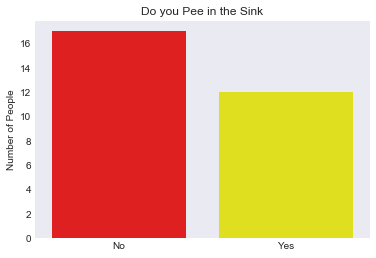

In [3]:
# How many people pee in their sinks
peers = pee.PeeSink.value_counts()
bi = ["No", "Yes"]
color = ['red' ,'yellow']

#Creat plot 
#plt.figure(figsize = (10,10))
sns.barplot(x = bi, y = peers, palette = color)
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

#labels
#plt.xlabel('Do you Pee in the Sink')
plt.ylabel('Number of People')
plt.title('Do you Pee in the Sink')

Only 41% of the sample pee in their sink

## Cleaning Data

In [4]:
#strip Characters in Country and Bathroom Distance
pee["Country"] = pee.Country.str.strip()
pee["BathroomDistance"] = pee["BathroomDistance"].astype(int)

#see which countries can be grouped up
pee["Country"].unique()

array(['France', 'USA', nan, 'India', 'Ukraine', 'South America', 'UK',
       'United States', 'Saudi Arabia', 'China',
       'Nelson, are you aware that people only tolerate you?', 'America',
       'Pakistan', 'Thailand', 'Venezuela'], dtype=object)

So we allowed "Country" to be an input form which resulted in many different answers. I'm going to aggregate the data into broader geographic regions for easier estimation

In [5]:
#Data cleaning
pee = pee.replace(["America","United States"], "USA")  
pee = pee.replace(["France","UK", "Ukraine"], "Europe")  
pee = pee.replace(["Saudi Arabia","China", "Thailand", "Pakistan", "India"], "Asia")  
pee.loc[pee.Country == "Venezuela", "Country"] = "South America"

pee["Country"].unique()

array(['Europe', 'USA', nan, 'Asia', 'South America',
       'Nelson, are you aware that people only tolerate you?'],
      dtype=object)

In [6]:
#average per group
group = pee.groupby('Country', as_index=False).agg('mean')
temp = group.sort_values(by = 'PeeSink', ascending=True)
group

,Country,PeeSink,BathroomDistance,Religious,Alcohol,Age
0,Asia,0.500000,11.200000,0.400000,1.0,25.800000
1,Europe,0.333333,3.666667,0.333333,1.0,25.333333
2,"Nelson, are you aware that people only tolerat...",0.000000,10.000000,0.000000,0.0,23.000000
3,South America,0.000000,13.000000,0.500000,0.5,25.500000
4,USA,0.500000,7.700000,0.800000,0.9,25.500000


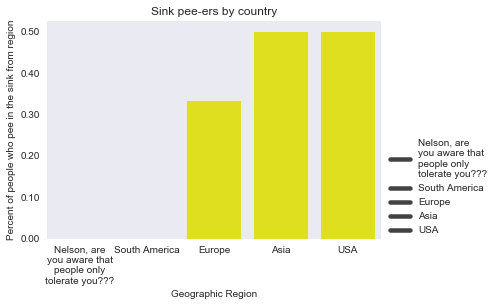

In [7]:
#making axis easier to read
temp.Country.replace("Nelson, are you aware that people only tolerate you?", "Nelson, are\nyou aware that\npeople only\ntolerate you???", inplace = True)

#setting colors and font size
color = ["yellow","yellow","yellow","yellow","yellow"]
sns.set_context("notebook", font_scale=1, rc={"lines.linewidth": 2.5})

#plot
ax = sns.barplot(x = temp.Country,y = temp.PeeSink, palette = color)

#axes
plt.title('Sink pee-ers by country')
#plt.yticks(ax.get_yticks(), ax.get_yticks() * 100)
ax.set_xlabel('Geographic Region',fontsize=10);
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.legend(temp.Country, bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Percent of people who pee in the sink from region',fontsize=10);

#N =2 for south america

Asian (South and East) and American respondents pee more in their sink than European counterparts, however only 2 respondents were South American so take it with a grain of salt. Also it looks like I already have fans at iHouse

## How does distance affect pee rate

In [8]:
# select data into two pee-ers and non pee-ers
peeyes = pee.loc[pee.PeeSink == 1]
peeno = pee.loc[pee.PeeSink == 0]

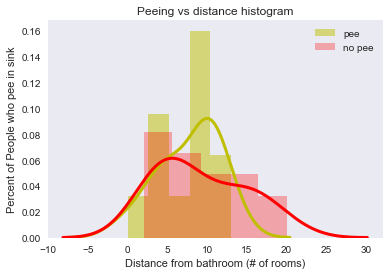

In [9]:
#distribution of pee based on distance from bathroom
ax = sns.distplot([peeyes.BathroomDistance], bins = 5, 
    color = "yellow", label = "pee",
    kde_kws = {"color": "y", "lw": 3},
    hist_kws = {"linewidth": 5,"alpha": .5, "color": "y"})
ax = sns.distplot([peeno.BathroomDistance], bins = 5, 
    color = "red", label = "no pee",
    kde_kws={"color": "r", "lw": 3},
    hist_kws={"linewidth": 5, "alpha": .3, "color": "red"})

#axes
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f')) # set number of decimals
plt.xlabel('Distance from bathroom (# of rooms)')
plt.ylabel('Percent of People who pee in sink')
plt.title('Peeing vs distance histogram')
plt.legend()
plt.show()


Being further away from the bathroom means you are more likely to pee in your sink. Notice the distribution of each are skewed in opposite directions. 

## How does Religion affect pee rate

In [10]:
#average per group in religious
peegroup = pee.groupby('Religious', as_index=False).agg('mean')
peegroup

,Religious,PeeSink,BathroomDistance,Alcohol,Age
0,0,0.333333,9.933333,0.800000,26.214286
1,1,0.500000,7.214286,0.928571,25.285714


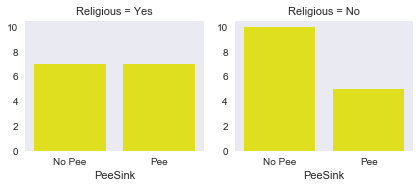

In [11]:
#changing labels to be readable
graph = pee
graph = graph.replace(1, "Yes")
graph = graph.replace(0, "No")
graph.PeeSink.replace("Yes", "Pee", inplace = True)
graph.PeeSink.replace("No", "No Pee", inplace = True)

##FACET GRID
#peeing based on religion
my_pal = {"Pee": "yellow", "No Pee": "red"}
g = sns.FacetGrid(graph, col = "Religious")
g = g.map(sns.countplot, "PeeSink", hue_order = ["Pee","No Pee"], color = "yellow")

#adding title to facet grid
plt.subplots_adjust(top=.8)
#g.fig.suptitle('Religion and Peeing in Sinks')

We were expecting the data to indicate the opposite but it seems that people who are not religious are less likely to pee in the sink

## How does age affect pee rate

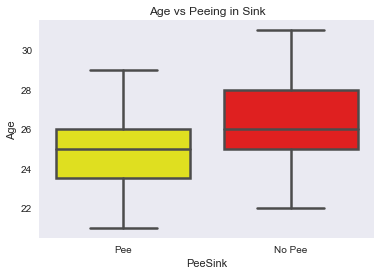

In [12]:
#pee based on age
graph2 = pee
graph2.PeeSink.replace(1, "Pee", inplace = True)
graph2.PeeSink.replace(0, "No Pee", inplace = True)
my_pal = {"Pee": "yellow", "No Pee": "red"}
plt.title('Age vs Peeing in Sink')


sns.boxplot(x = graph2.PeeSink, y = graph2.Age, palette = my_pal)


As expected, being older makes you less likely to pee in the sink

## How does alcohol drinking affect pee rate

Text(0.5,1,'People who drink at iHouse')

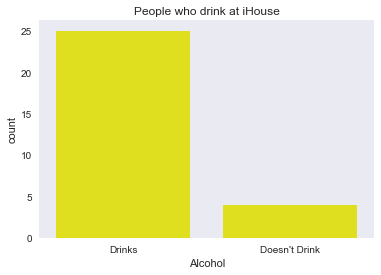

In [13]:
## the issue is that not enough people have drank alcohol before

graph3 = pee
graph3.Alcohol.replace(0, "Doesn't Drink",  inplace = True)
graph3.Alcohol.replace(1, "Drinks" ,inplace = True)

sns.countplot(graph3.Alcohol, color = "yellow")
plt.title('People who drink at iHouse')

Not enough people who answered the survey don't drink. However, 86.4% of Americans over 18 have drank alcohol according to national statistics which almost exactly matches the count. This is just an indication as to the quality of the survey

## Prediction

In [30]:
pee.PeeSink.replace("No Pee", "0", inplace = True)
pee.PeeSink.replace("Pee", "1", inplace = True)
pee.Alcohol.replace("Doesn't Drink",  0, inplace = True)
pee.Alcohol.replace("Drinks",  1, inplace = True)

pee = pee.drop(6, axis = 'index')

Y = pee.PeeSink
X = [pee.BathroomDistance, pee.Religious, pee.Alcohol, pee.Age]


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = np.array(X).T
Y = np.array(Y)

In [46]:
#split into x and y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [71]:
#fit model
clf = LogisticRegression(random_state=0, 
                         solver='liblinear').fit(X[:,[0,1,3]], Y)

In [72]:
#Bad training error also
clf.score(X[:,[0,1,3]], Y)

0.6428571428571429

# Conclusion

1. 41% of the population pees in the sink
2. Americans and Asians are the most likely to pee in their sinks
3. Being further away from the bathroom makes you more likely to pee in the sink
4. Being religious means you have an even chance of peeing in the sink, where as you are much less likely if you are not religious
5. Being younger makes you more likely to pee in the sink
